In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer 

In [7]:
import json

# Open and read the .ipynb file
with open(r'C:\Users\muska\Downloads\train.ipynb', 'r', encoding='utf-8') as f:
    notebook_data = json.load(f)

# Inspect the first few cells
notebook_data['cells'][:5]


[{'cell_type': 'markdown', 'metadata': {}, 'source': ['IMPORTING LIBRARIES']},
 {'cell_type': 'code',
  'execution_count': 38,
  'metadata': {},
  'outputs': [],
  'source': ['import pandas as pd\n',
   'import matplotlib.pyplot as plt\n',
   'import seaborn as sns\n',
   'import numpy as np\n',
   'from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler\n',
   'from sklearn.compose import make_column_transformer ']},
 {'cell_type': 'markdown',
  'metadata': {},
  'source': ['IMPORTING DATASET & UNDERSTANDING DATA']},
 {'cell_type': 'code',
  'execution_count': 39,
  'metadata': {},
  'outputs': [{'data': {'text/html': ['<div>\n',
      '<style scoped>\n',
      '    .dataframe tbody tr th:only-of-type {\n',
      '        vertical-align: middle;\n',
      '    }\n',
      '\n',
      '    .dataframe tbody tr th {\n',
      '        vertical-align: top;\n',
      '    }\n',
      '\n',
      '    .dataframe thead th {\n',
      '        text-align: right;\n',
  

In [10]:
import pandas as pd

# Provide path to the CSV file
df = pd.read_csv(r'C:\Users\muska\Downloads\train.csv')

# print the dataset structure
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [11]:
# Get a summary of numerical columns
print(df.describe())
print("Shape of the dataset:", df.shape)

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  
Shape of the dataset: (8523, 12)


In [12]:
# Check for missing values in the dataset
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [13]:
# Calculating the mean of 'Item_Visibility' for entries where it is greater than 0
non_zero_mean = df.loc[df['Item_Visibility'] > 0, 'Item_Visibility'].mean()

In [15]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())

In [17]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [18]:
# Fix inconsistencies in the 'Item_Fat_Content' column by standardizing the labels
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [19]:
# Checking for duplicates and removing them if any
df.drop_duplicates(inplace=True)

In [20]:
print(df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [21]:
# Save the cleaned dataset
df.to_csv('processed_train.csv', index=False)

In [22]:
p_df = pd.read_csv("processed_train.csv")
p_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [23]:
# Nominal columns (categorical without order)
nominal_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 
                   'Outlet_Identifier', 'Outlet_Location_Type', 
                   'Outlet_Type'] 

# Ordinal columns (categorical with order)
ordinal_columns = ['Outlet_Size']  

# Continuous (Numerical columns)
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
                    'Item_Outlet_Sales', 'Outlet_Establishment_Year']  

# Print the columns separated by type
print("Nominal Columns: ", nominal_columns)
print("Ordinal Columns: ", ordinal_columns)
print("Numerical Columns: ", numerical_columns)


Nominal Columns:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']
Ordinal Columns:  ['Outlet_Size']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Establishment_Year']


In [24]:
# Define mappings for ordinal encoding
Outlet_Size_mapping = ['Small', 'Medium', 'High'] 

In [25]:
# Create encoders and scaler
ohe = OneHotEncoder(sparse_output=False)  # For nominal columns
ode = OrdinalEncoder(categories=[Outlet_Size_mapping])  # For ordinal column
scaler = StandardScaler()  # For numeric columns

In [26]:
# Create the column transformer
ct = make_column_transformer(
    (ohe, ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 
            'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']),  # Nominal columns
    (ode, ['Outlet_Size']),  # Ordinal column
    (scaler, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
              'Outlet_Establishment_Year', 'Item_Outlet_Sales']),  # Numeric columns
    remainder='passthrough'  # Keep other columns as is
)

ct.set_output(transform= 'pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['Item_Identifier', 'Item_Fat_Content',
                                  'Item_Type', 'Outlet_Identifier',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Small', 'Medium',
                                                             'High']]),
                                 ['Outlet_Size']),
                                ('standardscaler', StandardScaler(),
                                 ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                  'Outlet_Establishment_Year',
                                  'Item_Outlet_Sales'])])

In [27]:
df_encoded = ct.fit_transform(p_df)
df_encoded

,onehotencoder__Item_Identifier_DRA12,onehotencoder__Item_Identifier_DRA24,onehotencoder__Item_Identifier_DRA59,onehotencoder__Item_Identifier_DRB01,onehotencoder__Item_Identifier_DRB13,onehotencoder__Item_Identifier_DRB24,onehotencoder__Item_Identifier_DRB25,onehotencoder__Item_Identifier_DRB48,onehotencoder__Item_Identifier_DRC01,onehotencoder__Item_Identifier_DRC12,...,onehotencoder__Outlet_Type_Grocery Store,onehotencoder__Outlet_Type_Supermarket Type1,onehotencoder__Outlet_Type_Supermarket Type2,onehotencoder__Outlet_Type_Supermarket Type3,ordinalencoder__Outlet_Size,standardscaler__Item_Weight,standardscaler__Item_Visibility,standardscaler__Item_MRP,standardscaler__Outlet_Establishment_Year,standardscaler__Item_Outlet_Sales
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-0.831187,-0.970732,1.747454,0.139541,0.910601
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,-1.630810,-0.908111,-1.489023,1.334103,-1.018440
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.108727,-0.956917,0.010040,0.139541,-0.049238
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.510904,-1.281758,0.660050,0.020085,-0.849103
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,-0.918719,-1.281758,-1.399220,-1.293934,-0.695373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,-1.407246,-0.181193,1.180783,-1.293934,0.349915
8519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-1.048835,-0.371154,-0.527301,0.497909,-0.956402
8520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.523639,-0.599784,-0.897208,0.736822,-0.579100
8521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,-1.325628,1.532880,-0.607977,1.334103,-0.196725


In [28]:
# Rename columns
new_column_names = {
    'onehotencoder__Item_Identifier_DRA12': 'ID_DRA12',
    'onehotencoder__Item_Identifier_DRA24': 'ID_DRA24',
    'onehotencoder__Item_Identifier_DRA59': 'ID_DRA59',
    'onehotencoder__Item_Identifier_DRB01': 'ID_DRB01',
    'onehotencoder__Item_Identifier_DRB13': 'ID_DRB13',
    'onehotencoder__Item_Identifier_DRB24': 'ID_DRB24',
    'onehotencoder__Item_Identifier_DRB25': 'ID_DRB25',
    'onehotencoder__Item_Identifier_DRB48': 'ID_DRB48',
    'onehotencoder__Item_Identifier_DRC01': 'ID_DRC01',
    'onehotencoder__Item_Identifier_DRC12': 'ID_DRC12',
    'onehotencoder__Outlet_Type_Grocery Store': 'Outlet_Grocery',
    'onehotencoder__Outlet_Type_Supermarket Type1': 'Outlet_Supermarket1',
    'onehotencoder__Outlet_Type_Supermarket Type2': 'Outlet_Supermarket2',
    'onehotencoder__Outlet_Type_Supermarket Type3': 'Outlet_Supermarket3',
    'ordinalencoder__Outlet_Size': 'Outlet_Size',
    'standardscaler__Item_Weight': 'Item_Weight',
    'standardscaler__Item_Visibility': 'Item_Visibility',
    'standardscaler__Item_MRP': 'Item_MRP',
    'standardscaler__Outlet_Establishment_Year': 'Establishment_Year',
    'standardscaler__Item_Outlet_Sales': 'Outlet_Sales'
}

# Apply the renaming
df_encoded.rename(columns=new_column_names, inplace=True)

df_encoded.head(5)


,ID_DRA12,ID_DRA24,ID_DRA59,ID_DRB01,ID_DRB13,ID_DRB24,ID_DRB25,ID_DRB48,ID_DRC01,ID_DRC12,...,Outlet_Grocery,Outlet_Supermarket1,Outlet_Supermarket2,Outlet_Supermarket3,Outlet_Size,Item_Weight,Item_Visibility,Item_MRP,Establishment_Year,Outlet_Sales
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-0.831187,-0.970732,1.747454,0.139541,0.910601
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,-1.630810,-0.908111,-1.489023,1.334103,-1.018440
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.108727,-0.956917,0.010040,0.139541,-0.049238
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.510904,-1.281758,0.660050,0.020085,-0.849103
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,-0.918719,-1.281758,-1.399220,-1.293934,-0.695373


In [29]:
# Random sample of 5 rows
random_sample = p_df.sample(n=5)
print("Random sample of 5 rows:\n", random_sample)

Random sample of 5 rows:
      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3495           FDX26         17.7          Low Fat         0.087987   
6448           FDH32         12.8          Low Fat         0.076370   
7644           FDA13         12.6          Low Fat         0.078175   
3769           FDT11         12.6          Regular         0.029230   
4720           FDT10         16.7          Regular         0.062297   

                  Item_Type  Item_MRP Outlet_Identifier  \
3495                  Dairy  181.4292            OUT045   
6448  Fruits and Vegetables   97.2410            OUT018   
7644                 Canned   39.9506            OUT027   
3769                 Breads  189.4556            OUT027   
4720            Snack Foods   60.6562            OUT018   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3495                       2002      Medium               Tier 2   
6448                       2009      Medium             

C:\Users\muska\AppData\Local\Temp\ipykernel_29496\795735786.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=p_df, estimator=sum, ci=None)


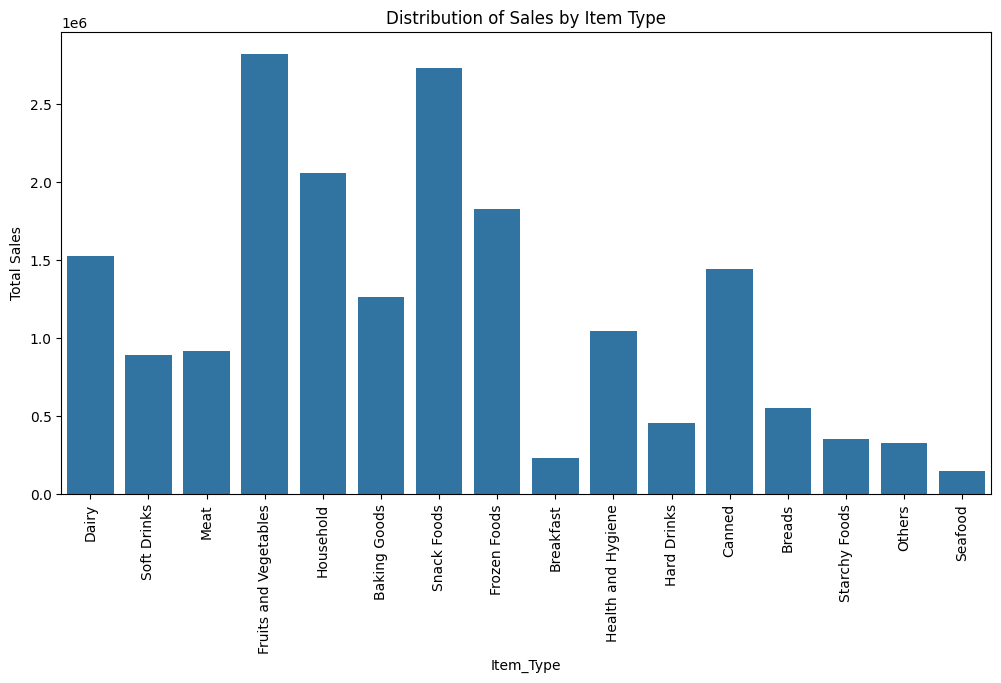

In [30]:
# Bar plot of total sales by Item Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=p_df, estimator=sum, ci=None)
plt.xticks(rotation=90)
plt.title('Distribution of Sales by Item Type')
plt.ylabel('Total Sales')
plt.show()


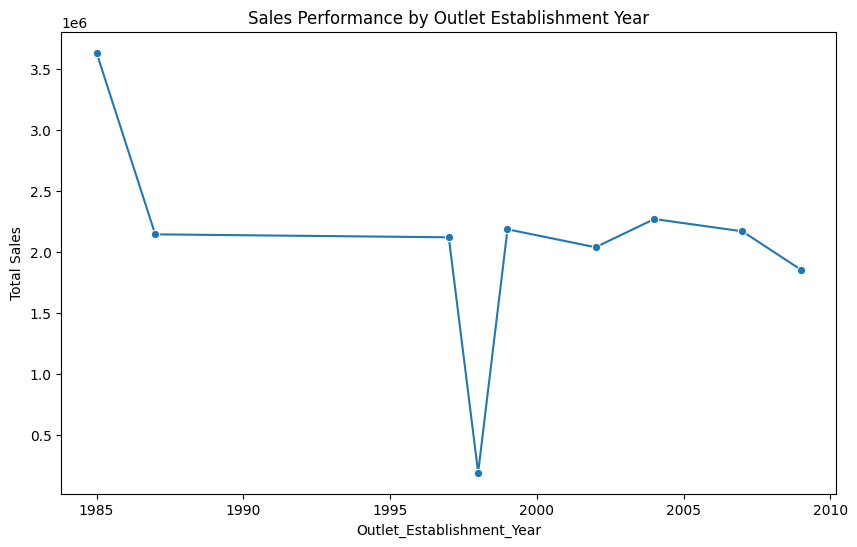

In [31]:
# Line plot for Sales Performance by Outlet Establishment Year
p_df_year_sales = p_df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=p_df_year_sales, marker='o')
plt.title('Sales Performance by Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.show()

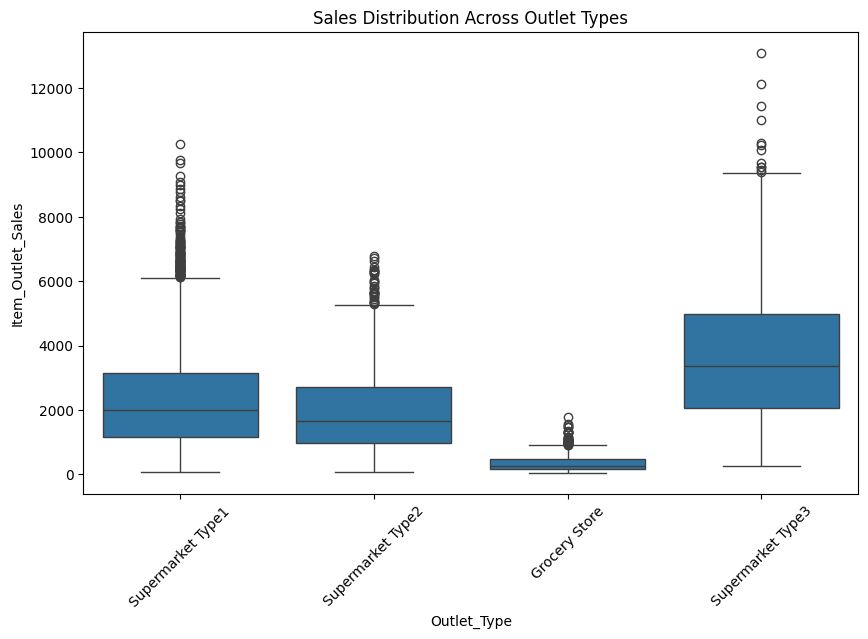

In [32]:
# Box plot of sales across Outlet Types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=p_df)
plt.title('Sales Distribution Across Outlet Types')
plt.xticks(rotation=45)
plt.show()

C:\Users\muska\AppData\Local\Temp\ipykernel_29496\3398120599.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=p_df, estimator=sum, ci=None)


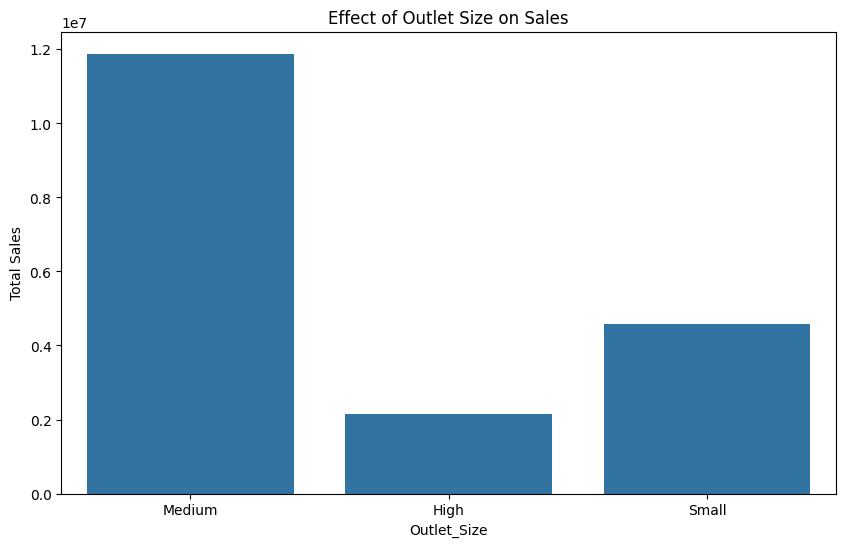

In [33]:
# Bar plot of sales by Outlet Size
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=p_df, estimator=sum, ci=None)
plt.title('Effect of Outlet Size on Sales')
plt.ylabel('Total Sales')
plt.show()

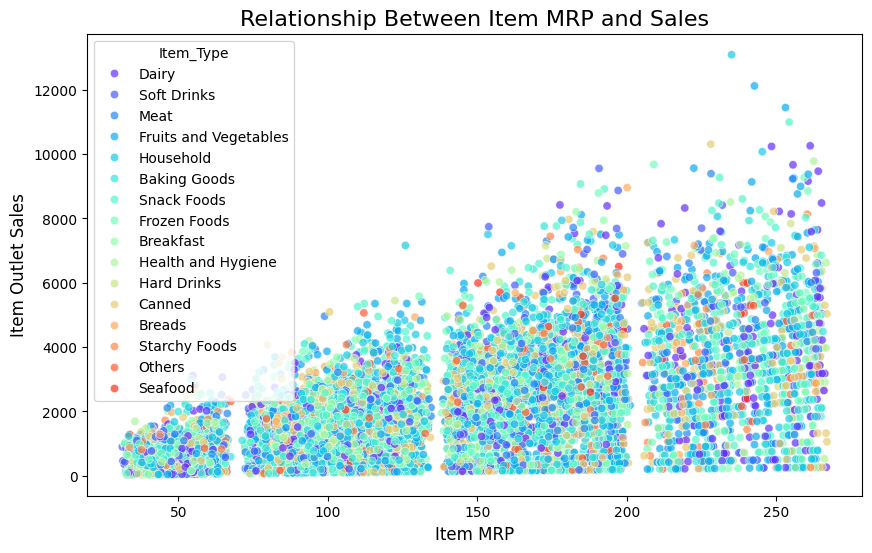

In [34]:
# 5. Relationship Between Item MRP and Sales (Scatter Plot)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=p_df, hue='Item_Type', palette="rainbow", alpha=0.7)
plt.title('Relationship Between Item MRP and Sales', fontsize=16)
plt.xlabel('Item MRP', fontsize=12)
plt.ylabel('Item Outlet Sales', fontsize=12)
plt.show()

In [35]:
print("Encoded DataFrame columns:\n", df_encoded.columns)

Encoded DataFrame columns:
 Index(['ID_DRA12', 'ID_DRA24', 'ID_DRA59', 'ID_DRB01', 'ID_DRB13', 'ID_DRB24',
       'ID_DRB25', 'ID_DRB48', 'ID_DRC01', 'ID_DRC12',
       ...
       'Outlet_Grocery', 'Outlet_Supermarket1', 'Outlet_Supermarket2',
       'Outlet_Supermarket3', 'Outlet_Size', 'Item_Weight', 'Item_Visibility',
       'Item_MRP', 'Establishment_Year', 'Outlet_Sales'],
      dtype='object', length=1600)


<Figure size 1500x1000 with 0 Axes>

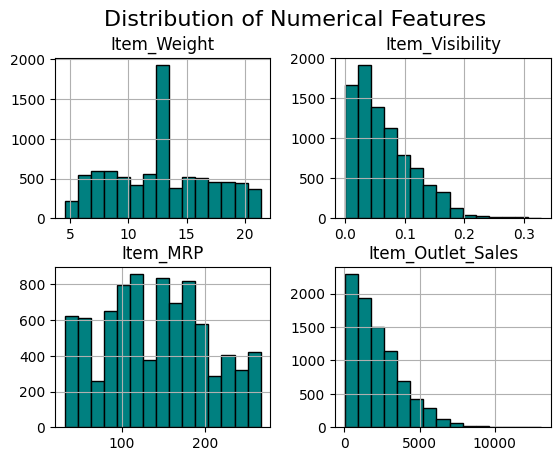

In [36]:
# Define numerical columns
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# 1. Visualizing the distribution of numerical features
plt.figure(figsize=(15, 10))
df[numerical_columns].hist(bins=15, color='teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

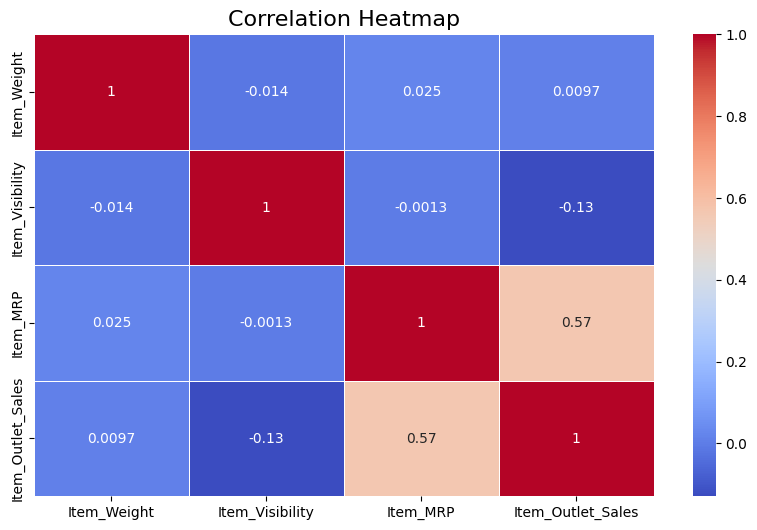

In [37]:
# 2. Checking Correlations between numerical features using a heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

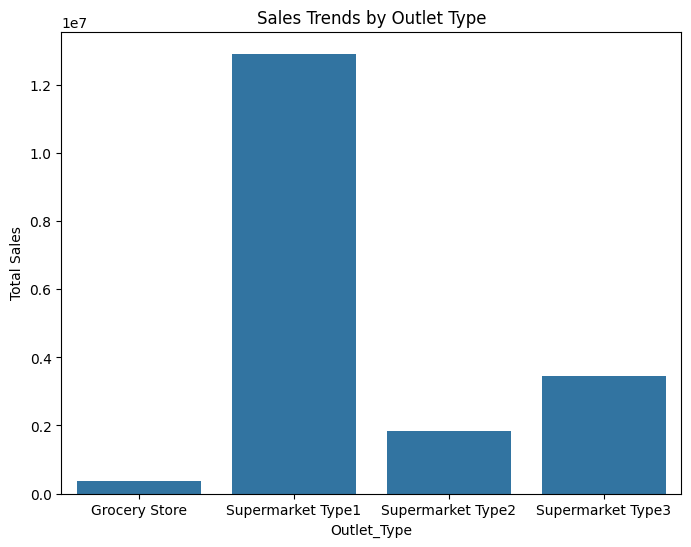

In [38]:
# Group by Outlet_Type and visualize sales trends
p_df_outlet_sales = p_df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=p_df_outlet_sales)
plt.title('Sales Trends by Outlet Type')
plt.ylabel('Total Sales')
plt.show()